<a href="https://colab.research.google.com/github/iqbalhabib/parkinson-ML-and-DL/blob/main/Parkinson_ML_and_DL_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Parkinson's Disease
Parkinson's disease is a brain disorder that causes unintended or uncontrollable movements, such as shaking, stiffness, and difficulty with balance and coordination.


In [ ]:
# Import Libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os,sys
import xgboost as xgb
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

### Collect Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Read dataset
dataset = pd.read_csv('/content/drive/MyDrive/Parkinson Detection/Code/Parkinsson disease.csv')
dataset.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


### Understand the data

In [ ]:
# Rename Column names
dataset.rename(columns=({'MDVP:Fo(Hz)':'avg_fre',
                         'MDVP:Fhi(Hz)':'max_fre',
                         'MDVP:Flo(Hz)':'min_fre',
                         'MDVP:Jitter(%)':'var_fre1',
                         'MDVP:Jitter(Abs)':'var_fre2',
                         'MDVP:RAP':'var_fre3',
                         'MDVP:PPQ':'var_fre4',
                         'Jitter:DDP':'var_fre5',
                         'MDVP:Shimmer':'var_amp1',
                         'MDVP:Shimmer(dB)':'var_amp2',
                         'Shimmer:APQ3':'var_amp3',
                         'Shimmer:APQ5':'var_amp4',
                         'MDVP:APQ':'var_amp5',
                         'Shimmer:DDA':'var_amp6'
                         }),inplace=True)
dataset.sample(5)

,name,avg_fre,max_fre,min_fre,var_fre1,var_fre2,var_fre3,var_fre4,var_fre5,var_amp1,...,var_amp6,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
47,phon_R01_S10_6,252.455,261.487,182.786,0.00185,0.000007,0.00092,0.00113,0.00276,0.01152,...,0.01841,0.00432,26.805,0,0.610367,0.635204,-7.319510,0.200873,2.028612,0.086398
72,phon_R01_S19_1,120.080,139.710,111.208,0.00405,0.000030,0.00180,0.00220,0.00540,0.01706,...,0.02921,0.00442,25.742,1,0.495954,0.762959,-5.791820,0.329066,2.205024,0.188180
22,phon_R01_S05_5,167.930,193.221,79.068,0.00442,0.000030,0.00220,0.00247,0.00661,0.04351,...,0.06685,0.01280,22.468,1,0.619060,0.679834,-4.330956,0.262384,2.916777,0.285695
192,phon_R01_S50_4,174.688,240.005,74.287,0.01360,0.000080,0.00624,0.00564,0.01873,0.02308,...,0.03804,0.10715,17.883,0,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728
6,phon_R01_S02_1,120.267,137.244,114.820,0.00333,0.000030,0.00155,0.00202,0.00466,0.01608,...,0.02337,0.00607,24.886,1,0.596040,0.764112,-5.634322,0.257682,1.854785,0.211756


In [ ]:
# Dataset info
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      195 non-null    object 
 1   avg_fre   195 non-null    float64
 2   max_fre   195 non-null    float64
 3   min_fre   195 non-null    float64
 4   var_fre1  195 non-null    float64
 5   var_fre2  195 non-null    float64
 6   var_fre3  195 non-null    float64
 7   var_fre4  195 non-null    float64
 8   var_fre5  195 non-null    float64
 9   var_amp1  195 non-null    float64
 10  var_amp2  195 non-null    float64
 11  var_amp3  195 non-null    float64
 12  var_amp4  195 non-null    float64
 13  var_amp5  195 non-null    float64
 14  var_amp6  195 non-null    float64
 15  NHR       195 non-null    float64
 16  HNR       195 non-null    float64
 17  status    195 non-null    int64  
 18  RPDE      195 non-null    float64
 19  DFA       195 non-null    float64
 20  spread1   195 non-null    float6

This dataset consist of 195 data each of them contain 24 information. i.e:
*   Matrix column entries (attributes):
*   name - ASCII subject name and recording number
*   MDVP:Fo(Hz) - Average vocal fundamental frequency
*   MDVP:Fhi(Hz) - Maximum vocal fundamental frequency
*   MDVP:Flo(Hz) - Minimum vocal fundamental frequency
*   MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP - Several measures of variation in fundamental frequency
*   MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA - Several measures of variation in amplitude
*   NHR,HNR - Two measures of ratio of noise to tonal components in the voice
*   status - Health status of the subject (one) - Parkinson's, (zero) - healthy
*   RPDE,D2 - Two nonlinear dynamical complexity measures
*   DFA - Signal fractal scaling exponent
spread1,spread2,PPE - Three nonlinear measures of fundamental frequency variation


### Handling Missing Value

In [ ]:
# Null value check
dataset.isnull().sum()

,0
name,0
avg_fre,0
max_fre,0
min_fre,0
var_fre1,0
var_fre2,0
var_fre3,0
var_fre4,0
var_fre5,0
var_amp1,0


There are no missing values.

### Handling duplicate data

In [ ]:
# Duplicate value check
dataset.duplicated().sum()

np.int64(0)

There are no duplicate entities.

### Remove Unwanted Features

In [ ]:
# Remove unwanted column
dataset.drop(columns="name",axis=1,inplace=True)
dataset.sample(5)

,avg_fre,max_fre,min_fre,var_fre1,var_fre2,var_fre3,var_fre4,var_fre5,var_amp1,var_amp2,...,var_amp6,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
83,98.804,102.305,87.804,0.00432,0.00004,0.00247,0.00258,0.00742,0.02223,0.202,...,0.03831,0.00882,22.244,1,0.576644,0.772416,-6.025367,0.078202,2.053601,0.177275
102,139.224,586.567,66.157,0.03011,0.00022,0.01854,0.01628,0.05563,0.09419,0.930,...,0.16654,0.25930,10.489,1,0.596362,0.641418,-3.269487,0.270641,2.690917,0.444774
152,198.116,233.099,174.478,0.02714,0.00014,0.01568,0.01699,0.04705,0.08684,1.018,...,0.12851,0.16265,9.449,1,0.584164,0.754449,-2.839756,0.356224,3.184027,0.454721
29,162.568,198.346,77.630,0.00502,0.00003,0.00280,0.00253,0.00841,0.01791,0.168,...,0.02380,0.01170,25.678,1,0.427785,0.723797,-6.635729,0.209866,1.957961,0.135242
119,217.116,233.481,93.978,0.00404,0.00002,0.00127,0.00128,0.00381,0.01299,0.124,...,0.02038,0.00681,24.581,1,0.462516,0.582710,-5.517173,0.389295,2.925862,0.220657


### Data Analysis

In [ ]:
# Statistical Analysis of Data
dataset.describe()

,avg_fre,max_fre,min_fre,var_fre1,var_fre2,var_fre3,var_fre4,var_fre5,var_amp1,var_amp2,...,var_amp6,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


In [ ]:
# All columns name
dataset.columns

Index(['avg_fre', 'max_fre', 'min_fre', 'var_fre1', 'var_fre2', 'var_fre3',
       'var_fre4', 'var_fre5', 'var_amp1', 'var_amp2', 'var_amp3', 'var_amp4',
       'var_amp5', 'var_amp6', 'NHR', 'HNR', 'status', 'RPDE', 'DFA',
       'spread1', 'spread2', 'D2', 'PPE'],
      dtype='object')

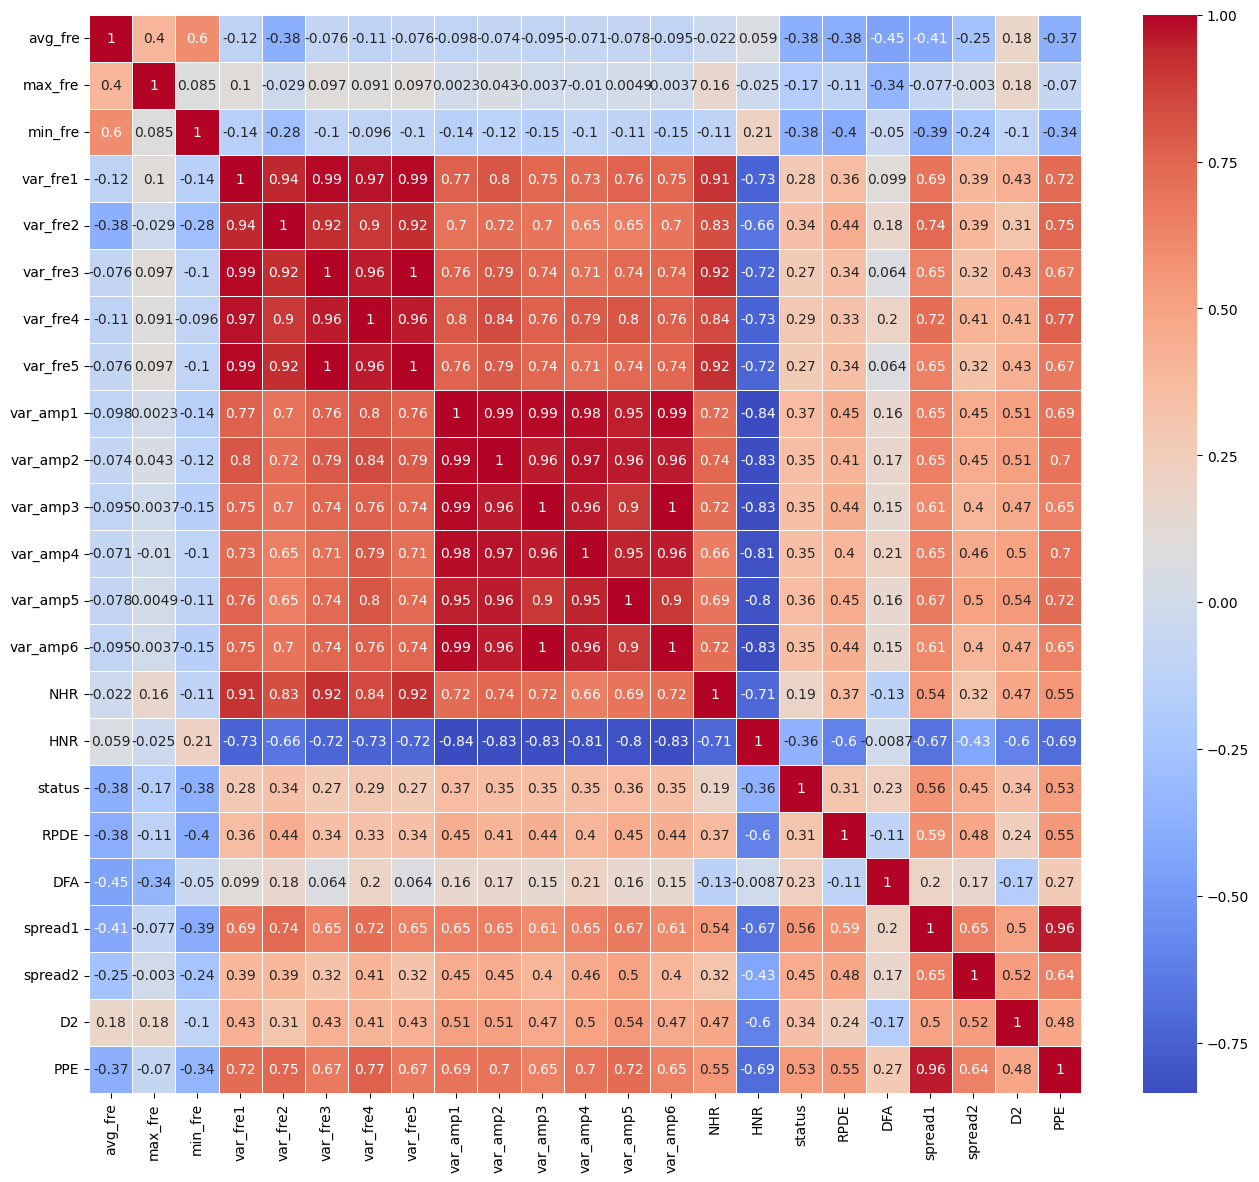

In [ ]:
# Data Correlation
plt.figure(figsize=(16, 14))
sns.heatmap(dataset.corr(), annot=True, cmap='coolwarm', linewidths=.5)
plt.show()

### Remove Outliers

In [ ]:
# Understanding Outliers (upper bound - Lower bound)
dataset.describe()

,avg_fre,max_fre,min_fre,var_fre1,var_fre2,var_fre3,var_fre4,var_fre5,var_amp1,var_amp2,...,var_amp6,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


In [ ]:
# Shape of data
dataset.shape

(195, 23)

In [ ]:
# Remove outliers
dataset = dataset[dataset.max_fre <= 300]
dataset = dataset[dataset.var_fre1 <= 0.02]
dataset = dataset[dataset.var_fre2 <= 0.0001]
dataset = dataset[dataset.var_fre3 <= 0.01]
dataset = dataset[dataset.var_fre4 <= 0.01]
dataset = dataset[dataset.var_fre5 <= 0.02]
dataset = dataset[dataset.var_amp1 <= 0.10]
dataset = dataset[dataset.var_amp2 <= 1.0]
dataset = dataset[dataset.var_amp3 <= 0.04]
dataset = dataset[dataset.var_amp4 <= 0.050]
dataset = dataset[dataset.var_amp5 <= 0.075]
dataset = dataset[dataset.var_amp6 <= 0.125]
dataset = dataset[dataset.NHR <= 0.15]


In [ ]:
# Shape of data
dataset.shape

(168, 23)

### Determine Features and Label

In [ ]:
# get features and labels
x= dataset.loc[:,dataset.columns!='status'].values[:,1:]
x1= dataset.loc[:,dataset.columns!='status']
y= dataset.loc[:,'status'].values
y1= dataset.loc[:,'status']

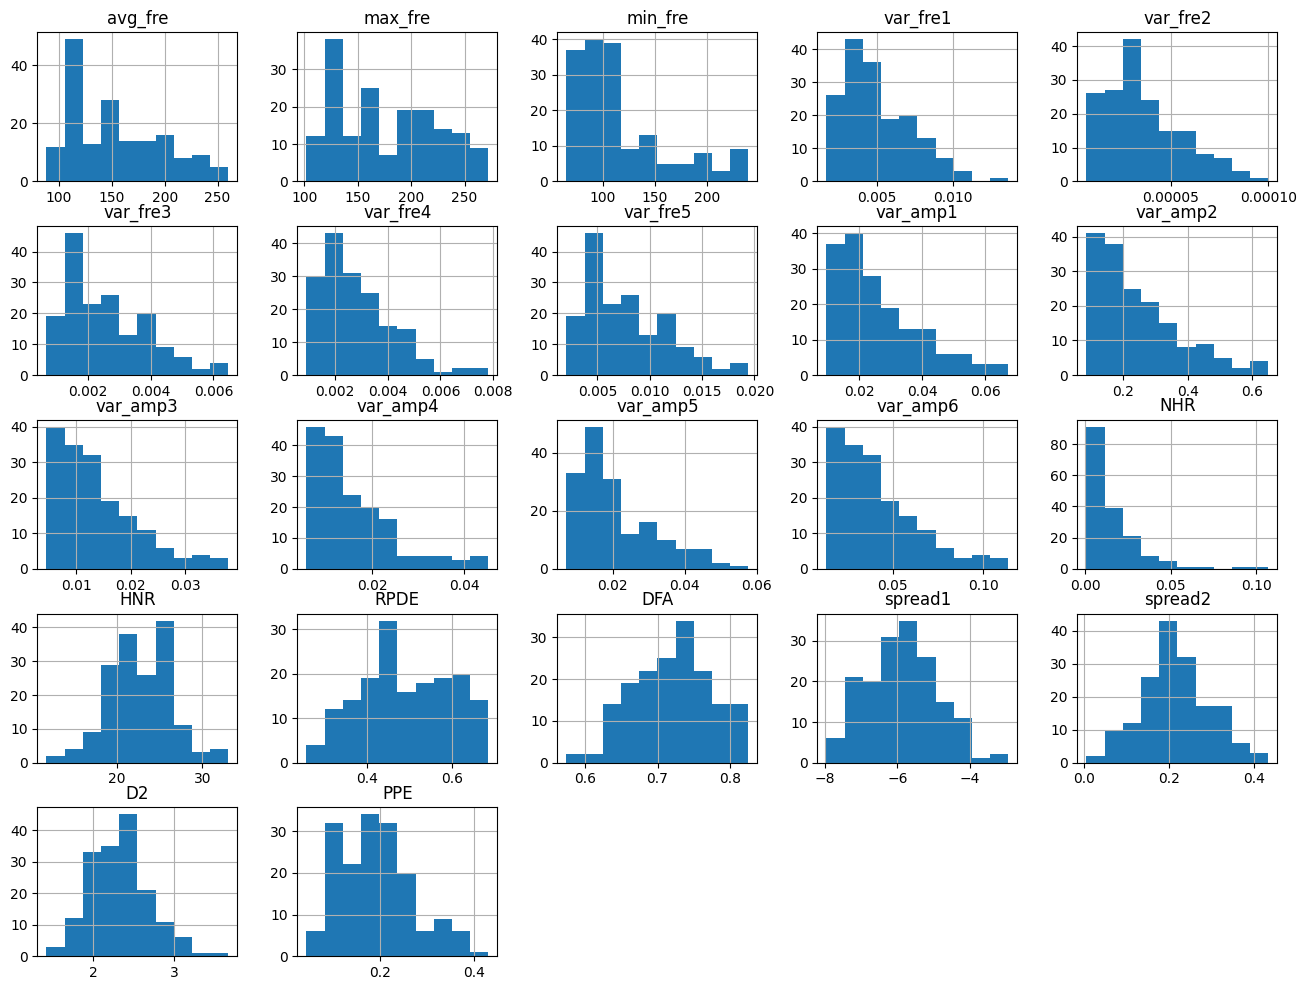

In [ ]:
x1.hist(figsize=(16,12))
plt.show()

### Scale the value

In [ ]:
#Scale the features to between -1 and 1
scaler=MinMaxScaler((-1,1))
x1=scaler.fit_transform(x)
y1=y

### Train Test Split

In [ ]:
#Split the dataset
xtrain,xtest,ytrain,ytest=train_test_split(x1, y1, test_size=0.2, random_state=42)

### Model Selection

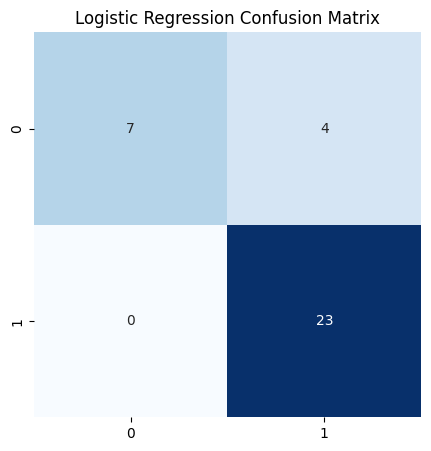

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.64      0.78        11
           1       0.85      1.00      0.92        23

    accuracy                           0.88        34
   macro avg       0.93      0.82      0.85        34
weighted avg       0.90      0.88      0.87        34



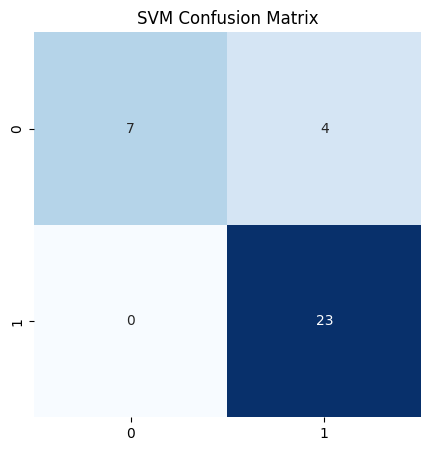

SVM Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.64      0.78        11
           1       0.85      1.00      0.92        23

    accuracy                           0.88        34
   macro avg       0.93      0.82      0.85        34
weighted avg       0.90      0.88      0.87        34



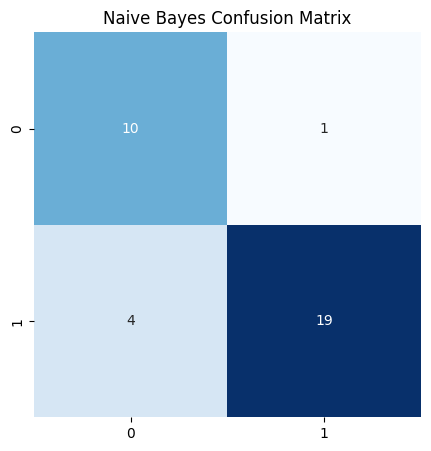

Naive Bayes Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.91      0.80        11
           1       0.95      0.83      0.88        23

    accuracy                           0.85        34
   macro avg       0.83      0.87      0.84        34
weighted avg       0.87      0.85      0.86        34



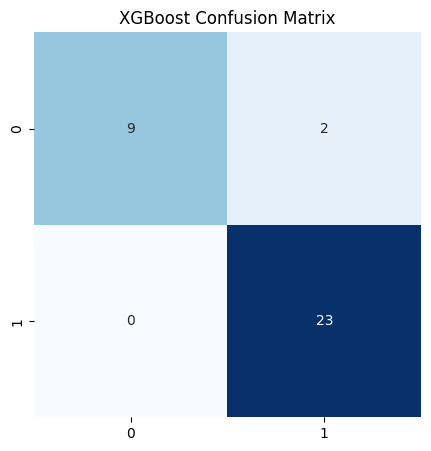

XGBoost Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.82      0.90        11
           1       0.92      1.00      0.96        23

    accuracy                           0.94        34
   macro avg       0.96      0.91      0.93        34
weighted avg       0.95      0.94      0.94        34



In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier

from sklearn.metrics import confusion_matrix, classification_report

def train_and_evaluate():
    # Models
    models = {
        'Logistic Regression': LogisticRegression(),
        'SVM': SVC(),
        'Naive Bayes': GaussianNB(),
        'XGBoost': XGBClassifier()
    }

    results = {}

    for model_name, model in models.items():
        model.fit(xtrain, ytrain)
        predictions = model.predict(xtest)
        cm = confusion_matrix(ytest, predictions)
        cr = classification_report(ytest, predictions)

        results[model_name] = {'model': model, 'confusion_matrix': cm, 'classification_report': cr}

    return results

def plot_confusion_matrix(cm, title):
    plt.figure(figsize=(5, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(title)
    plt.show()

def print_classification_report(cr, title):
    print(f"{title} Classification Report:")
    print(cr)


results = train_and_evaluate()

for model_name, result in results.items():
    plot_confusion_matrix(result['confusion_matrix'], f'{model_name} Confusion Matrix')
    print_classification_report(result['classification_report'], model_name)


## XGBoost

In [ ]:
# Train the model
from xgboost import XGBClassifier

model=XGBClassifier()
model.fit(xtrain,ytrain)
predict=model.predict(xtest)

In [ ]:
print(accuracy_score(ytest,predict)*100)

94.11764705882352


### Result Evaluation

Text(0.5, 1.0, 'Output Confusion Matrix')

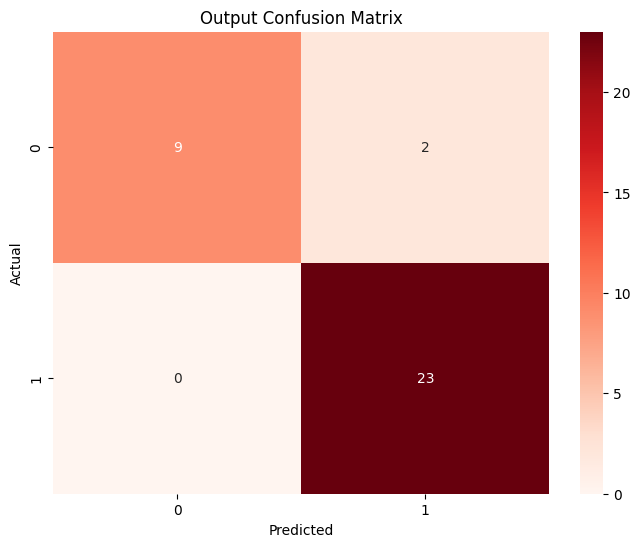

In [ ]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(ytest,predict)
plt.figure(figsize=(8,6))
fg=sns.heatmap(cm,annot=True,cmap="Reds")
figure=fg.get_figure()
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title("Output Confusion Matrix")

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Calculate precision
precision = precision_score(ytest,predict)

# Calculate recall
recall = recall_score(ytest,predict)

# Calculate F1 score
f1 = f1_score(ytest,predict)

# Print the results
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


Precision: 0.92
Recall: 1.0
F1 Score: 0.9583333333333334


## Neural Network

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import numpy as np

Epoch 1/50
134/134 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8013 - loss: 0.5604 - val_accuracy: 0.8824 - val_loss: 0.3908
Epoch 2/50
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8481 - loss: 0.4066 - val_accuracy: 0.7647 - val_loss: 0.3931
Epoch 3/50
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8900 - loss: 0.2965 - val_accuracy: 0.8824 - val_loss: 0.2591
Epoch 4/50
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9092 - loss: 0.2433 - val_accuracy: 0.9118 - val_loss: 0.1923
Epoch 5/50
134/134 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8968 - loss: 0.2676 - val_accuracy: 0.8824 - val_loss: 0.2102
Epoch 6/50
134/134 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9036 - loss: 0.2227 - val_accuracy: 0.9412 - val_loss: 0.1441
Epoch 7/50
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8203 - loss: 0.2781 - val_accuracy: 0.9118 - val_loss: 0.2267
Epoch 8/50
134/134 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9157 - loss: 0.1744 - val_accuracy: 0.

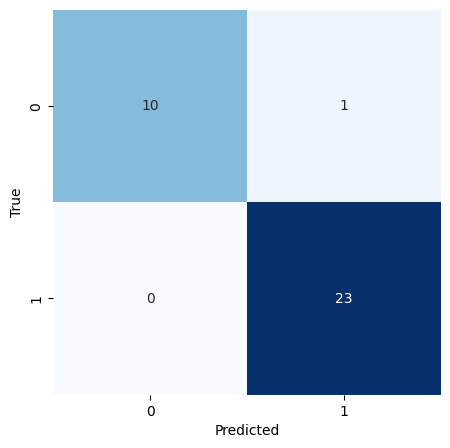

In [ ]:
# Define the model
model = Sequential()
model.add(Dense(64, input_dim=xtrain.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(xtrain, ytrain, epochs=50, batch_size=1, validation_data=(xtest, ytest))

# Evaluate the model on the test set
y_pred = model.predict(xtest)
y_pred_classes = np.round(y_pred)

# Print classification report
print(classification_report(ytest, y_pred_classes))

# Plot confusion matrix
cm = confusion_matrix(ytest, y_pred_classes)
plt.figure(figsize=(5, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │         1,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,565 (41.27 KB)

 Trainable params: 3,521 (13.75 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 7,044 (27.52 KB)

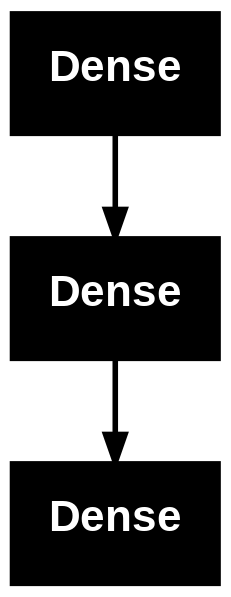

In [ ]:
from keras.utils import plot_model
plot_model(model, to_file='model.png')

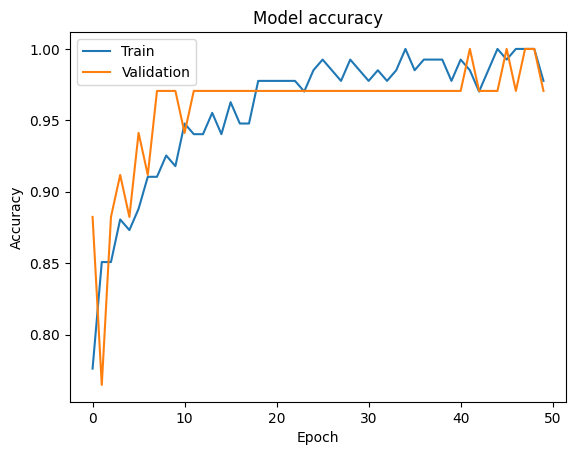

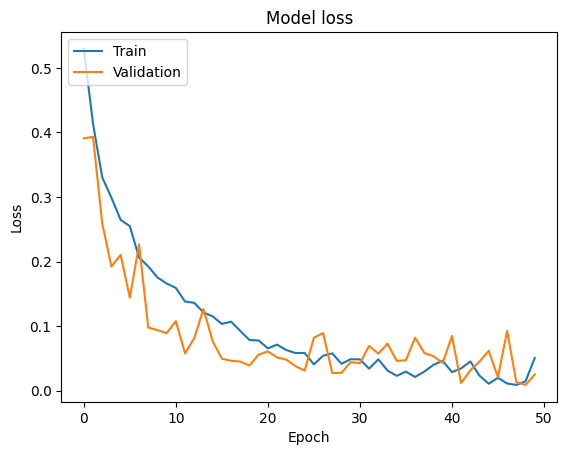

In [ ]:
# Plot training history
def plot_history(history):
    # Plot training & validation accuracy values
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()

    # Plot training & validation loss values
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()

# Call the function to plot the history
plot_history(history)
